In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import os

def get_newest_csv_file(dir_path):
    csv_files = []
    for file in os.listdir(dir_path):
        if file.endswith(".csv"):
            csv_files.append(file)
    if not csv_files:
        return None
    newest_csv_file = max(csv_files, key=os.path.getctime)
    return os.path.join(dir_path, newest_csv_file)

In [2]:
csv_file = get_newest_csv_file('/Users/heiko/Development/drasyl/')
print(csv_file)

/Users/heiko/Development/drasyl/WormholeSendChildChannelInitializer-56649.csv


In [3]:
df = pd.read_csv(csv_file)

# RFC 9293: Send Sequence Variables
df['Rel.SND.UNA'] = df['SND.UNA'] - df['ISS']
df['Rel.SND.NXT'] = df['SND.NXT'] - df['ISS']
df['Rel.SND.WL1'] = df['SND.WL1'] - df['IRS']
df['Rel.SND.WL2'] = df['SND.WL2'] - df['IRS']

# RFC 9293: Receive Sequence Variables
df['Rel.RCV.NXT'] = df['RCV.NXT'] - df['IRS']

# RFC 5681: TCP Congestion Control
df['FLIGHT SIZE'] = df['SND.NXT'] - df['SND.UNA']

df

,pid,time,SND.UNA,SND.NXT,SND.WND,SND.WL1,SND.WL2,ISS,SND.BUF,RCV.NXT,...,SRTT,RTO,cwnd,ssthresh,Rel.SND.UNA,Rel.SND.NXT,Rel.SND.WL1,Rel.SND.WL2,Rel.RCV.NXT,FLIGHT SIZE
0,56649,"Tue, 21 Mar 2023 01:02:47 +0100",2985519406,2985519406,91648,3546105619,2985519406,2985519405,0,3546105619,...,7.0,1000,3790,91648,1,1,1,-560586212,1,0
1,56649,"Tue, 21 Mar 2023 01:02:47 +0100",2985519406,2985519406,91648,3546105619,2985519406,2985519405,0,3546105661,...,22.0,1000,3790,91648,1,1,1,-560586212,43,0
2,56649,"Tue, 21 Mar 2023 01:02:47 +0100",2985519470,2985523073,91584,3546105661,2985519470,2985519405,61933,3546105661,...,22.0,1000,3854,91648,65,3668,43,-560586148,43,3603
3,56649,"Tue, 21 Mar 2023 01:02:47 +0100",2985535083,2985554299,89246,3546105661,2985535083,2985519405,30707,3546105661,...,27.0,1000,19467,91648,15678,34894,43,-560570535,43,19216
4,56649,"Tue, 21 Mar 2023 01:02:47 +0100",2985674399,2985723640,89246,3546105661,2985674399,2985519405,630,3546105661,...,23.0,1000,93663,91648,154994,204235,43,-560431219,43,49241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5722,56649,"Tue, 21 Mar 2023 01:12:19 +0100",3675960810,3675960810,91648,3546105662,3675960810,2985519405,0,3546105662,...,20.0,1000,73049,22218,690441405,690441405,44,129855192,44,0
5723,56649,"Tue, 21 Mar 2023 01:12:19 +0100",3675960810,3675960810,91648,3546105662,3675960810,2985519405,0,3546105662,...,20.0,1000,73049,22218,690441405,690441405,44,129855192,44,0
5724,56649,"Tue, 21 Mar 2023 01:12:19 +0100",3675960810,3675960810,91648,3546105662,3675960810,2985519405,0,3546105662,...,20.0,1000,73049,22218,690441405,690441405,44,129855192,44,0
5725,56649,"Tue, 21 Mar 2023 01:12:19 +0100",3675960810,3675960810,91648,3546105662,3675960810,2985519405,0,3546105662,...,20.0,1000,73049,22218,690441405,690441405,44,129855192,44,0


# RFC 9293: Send Sequence Variables

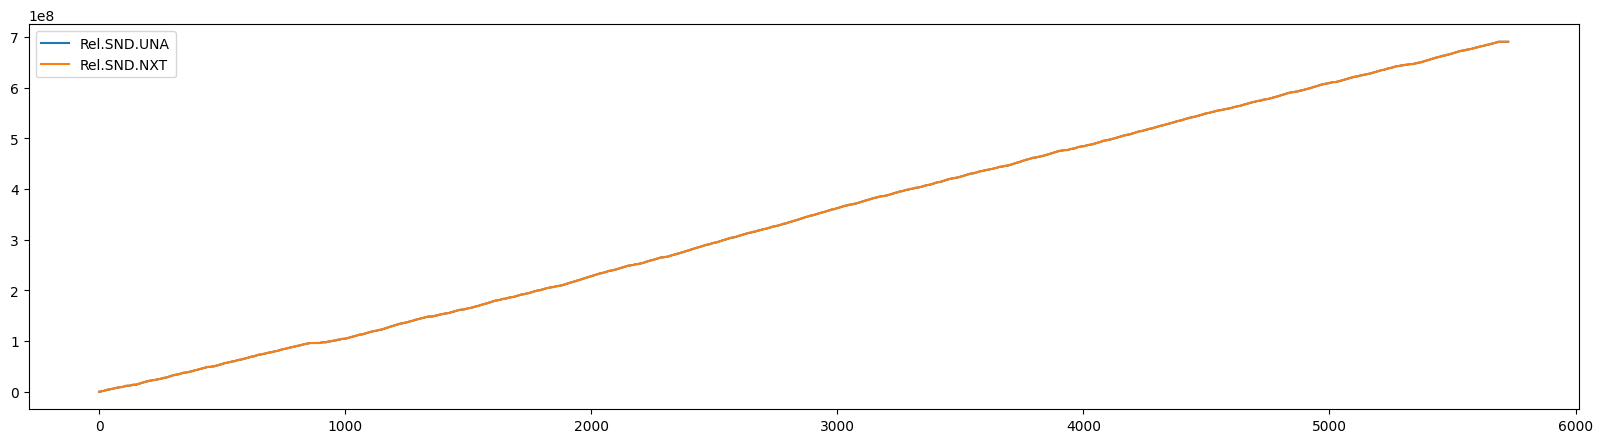

In [4]:
df.plot(y=['Rel.SND.UNA', 'Rel.SND.NXT'], figsize=(20, 5))
mp.show()

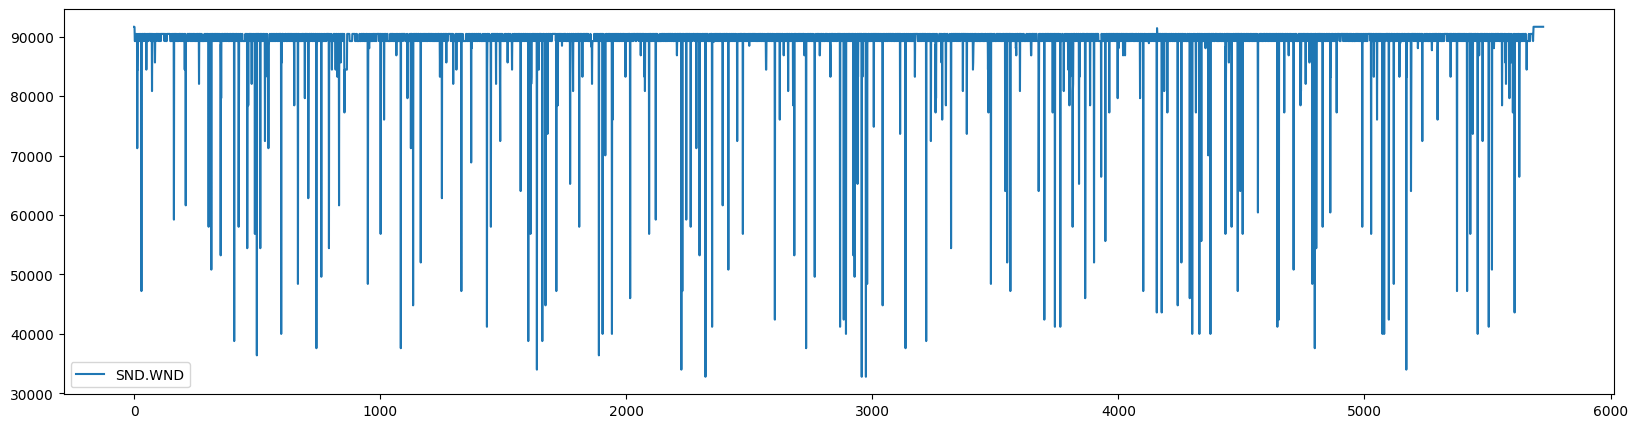

In [5]:
df.plot(y=['SND.WND'], figsize=(20, 5))
mp.show()

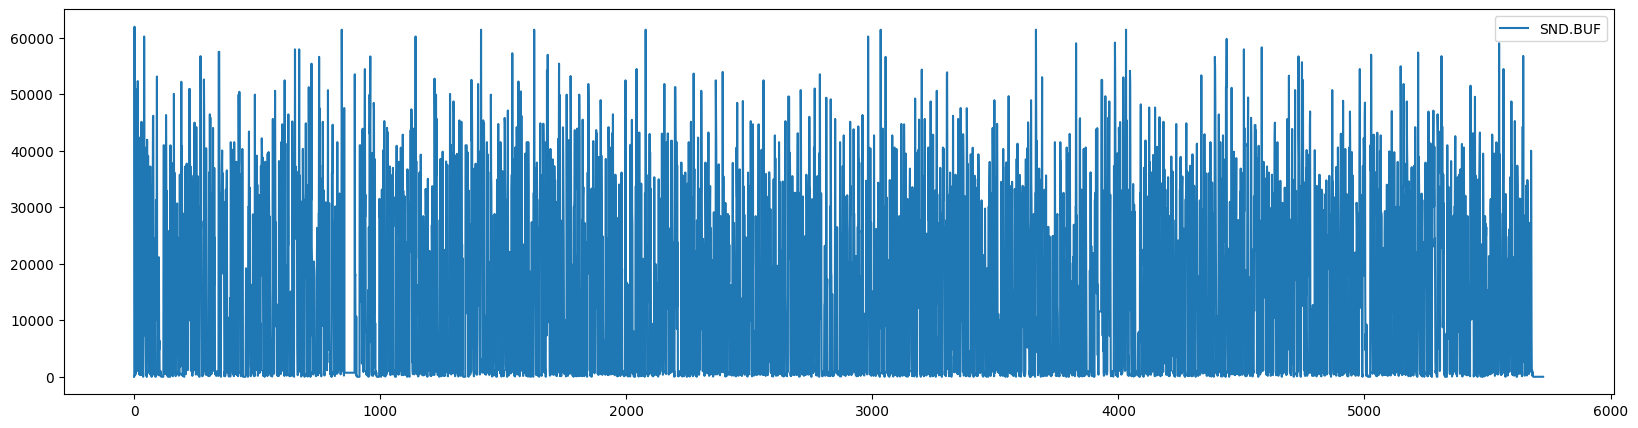

In [6]:
df.plot(y=['SND.BUF'], figsize=(20, 5))
mp.show()

# RFC 9293: Receive Sequence Variables

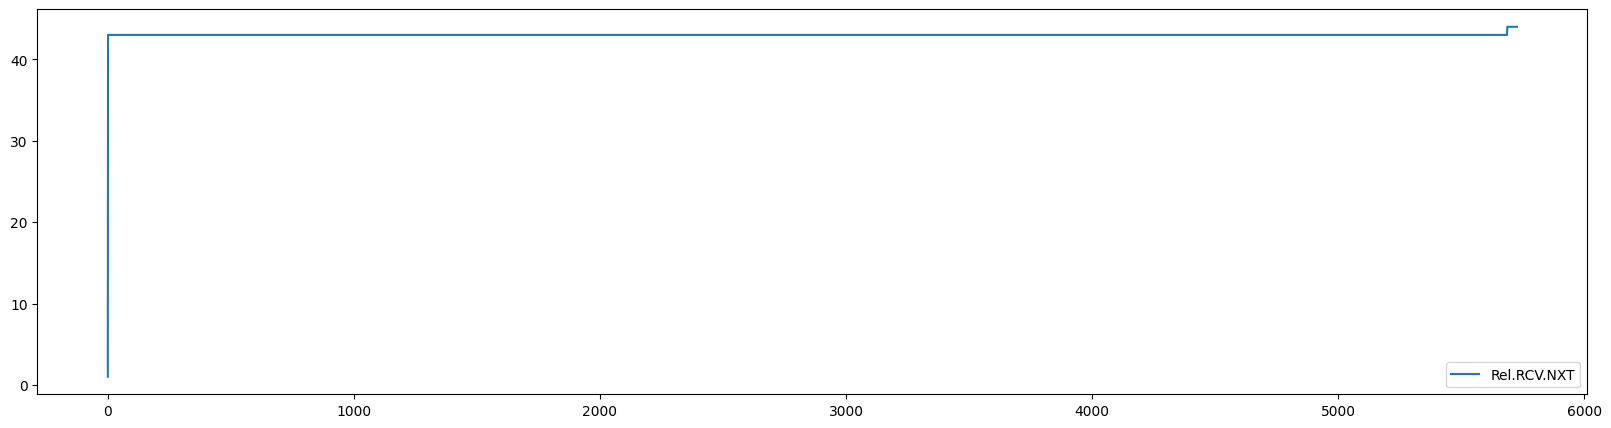

In [7]:
df.plot(y=['Rel.RCV.NXT'], figsize=(20, 5))
mp.show()

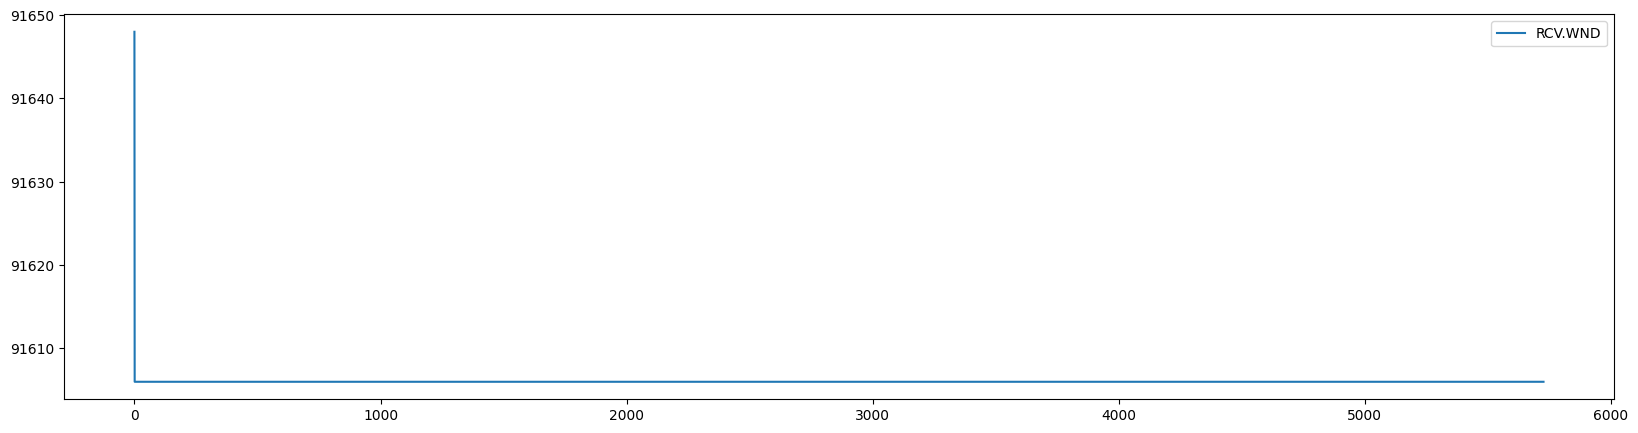

In [8]:
df.plot(y=['RCV.WND'], figsize=(20, 5))
mp.show()

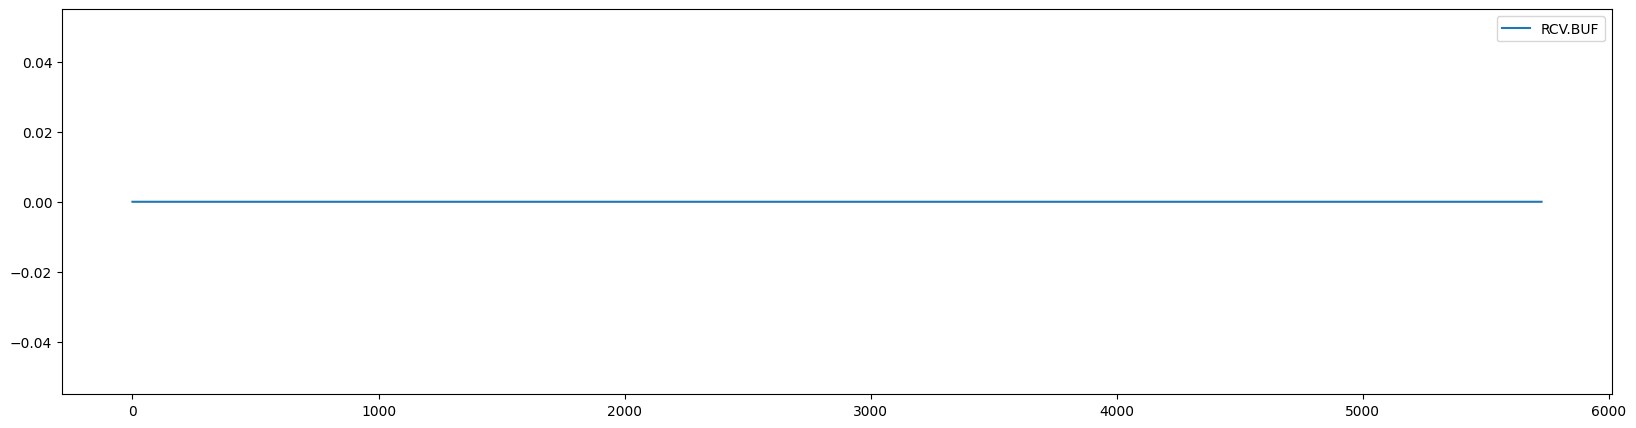

In [9]:
df.plot(y=['RCV.BUF'], figsize=(20, 5))
mp.show()

# RFC 6298: Retransmission Timer Computation

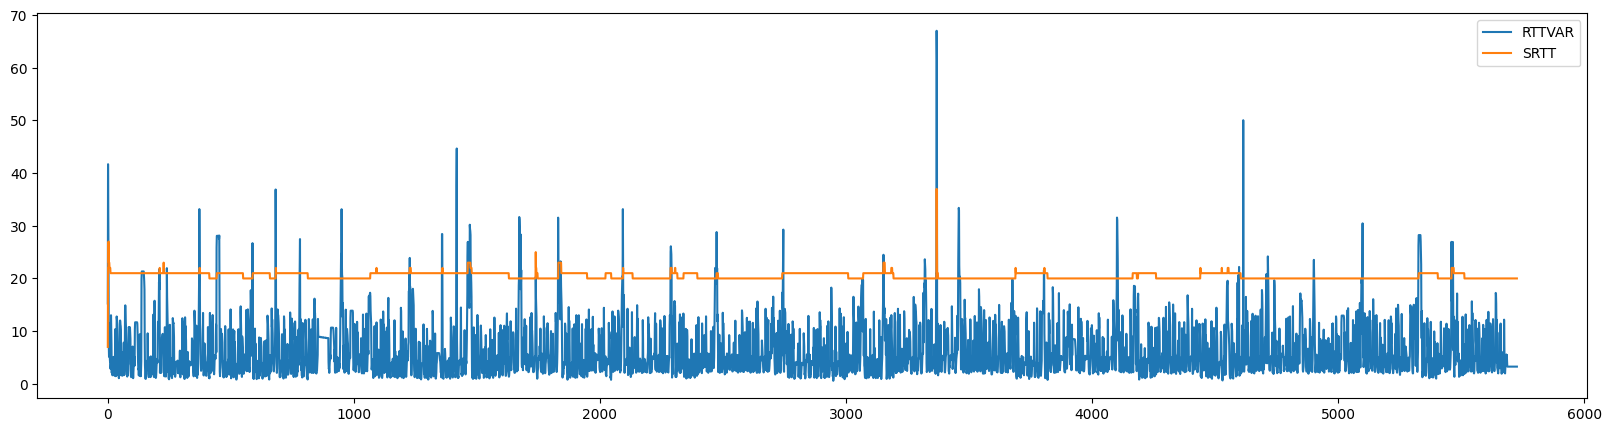

In [10]:
df.plot(y=['RTTVAR', 'SRTT'], figsize=(20, 5))
mp.show()

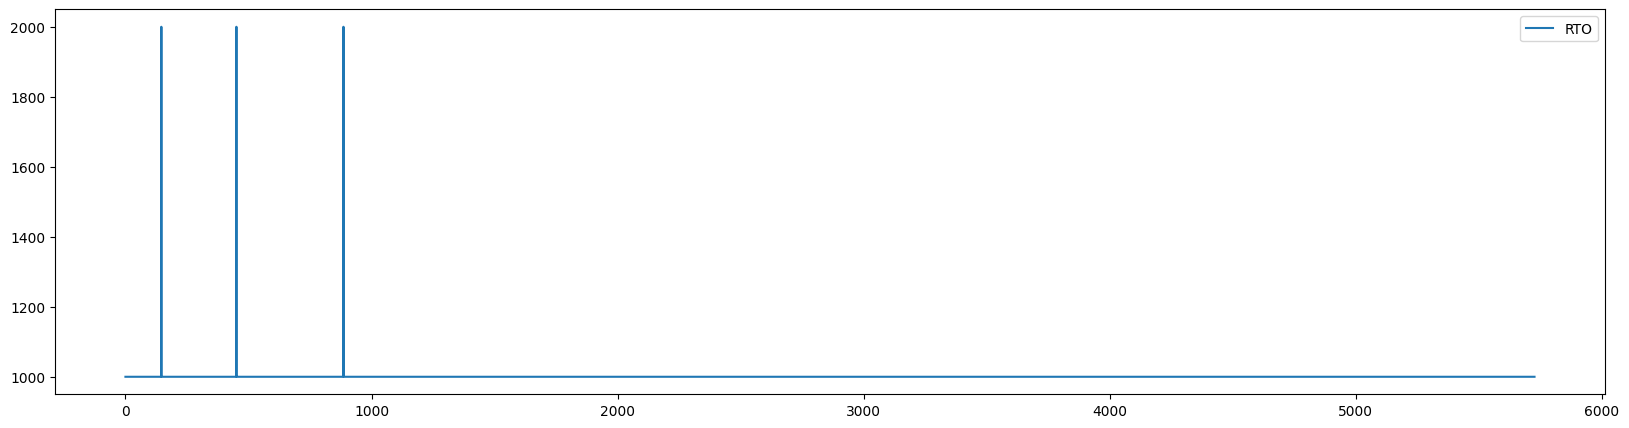

In [11]:
df.plot(y=['RTO'], figsize=(20, 5))
mp.show()

# RFC 5681: Congestion Control Algorithms

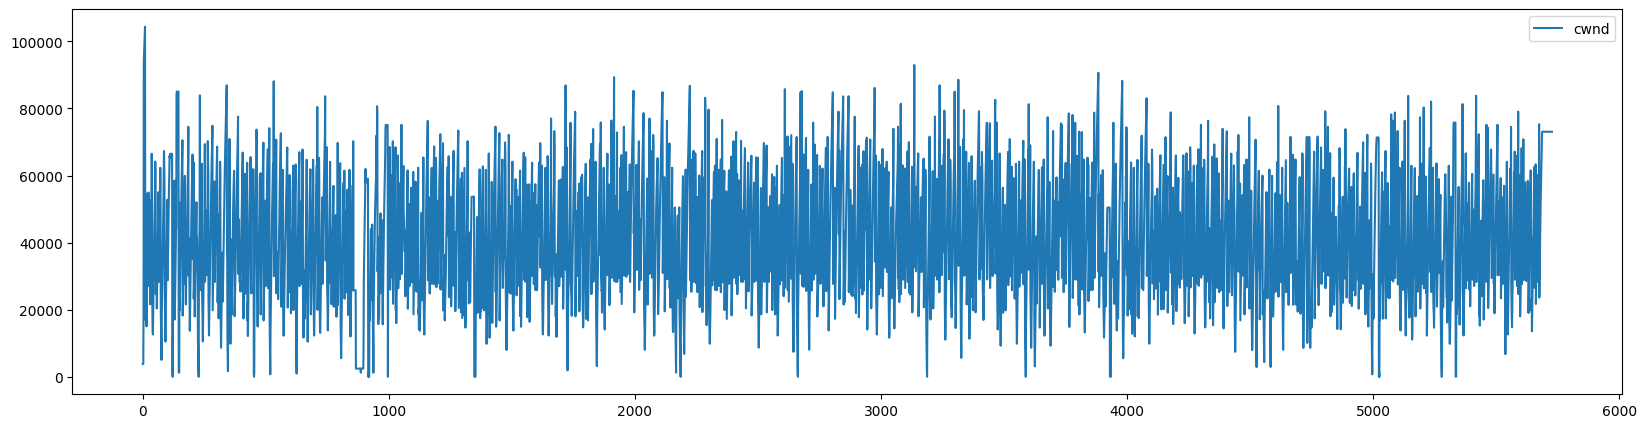

In [12]:
df.plot(y=['cwnd'], figsize=(20, 5))
mp.show()

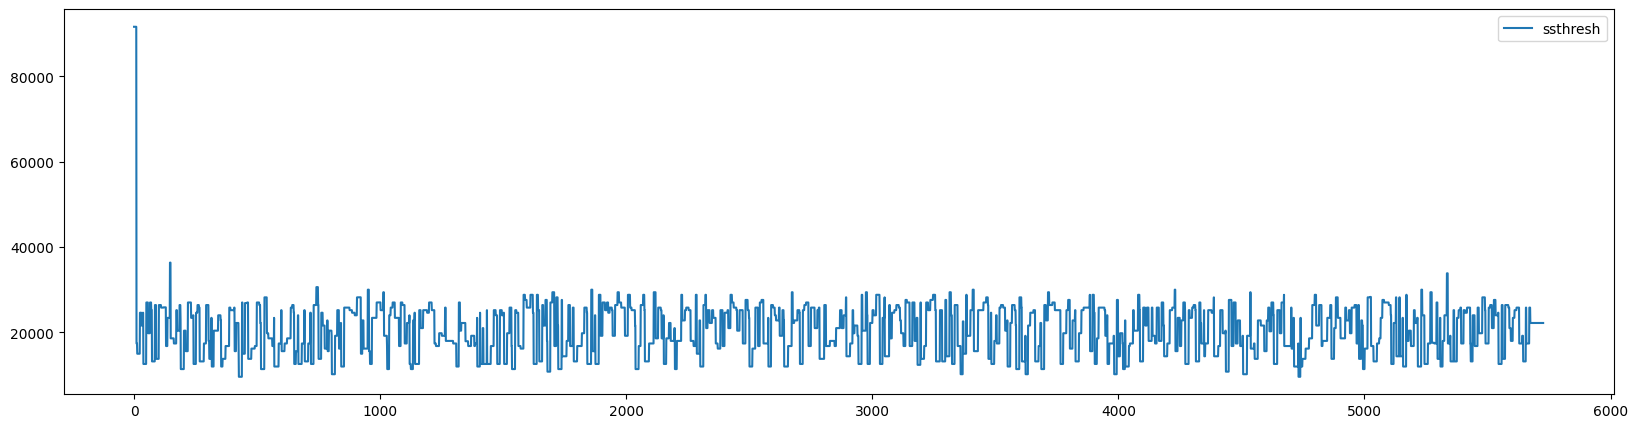

In [13]:
df.plot(y=['ssthresh'], figsize=(20, 5))
mp.show()

# RFC 5681: TCP Congestion Control

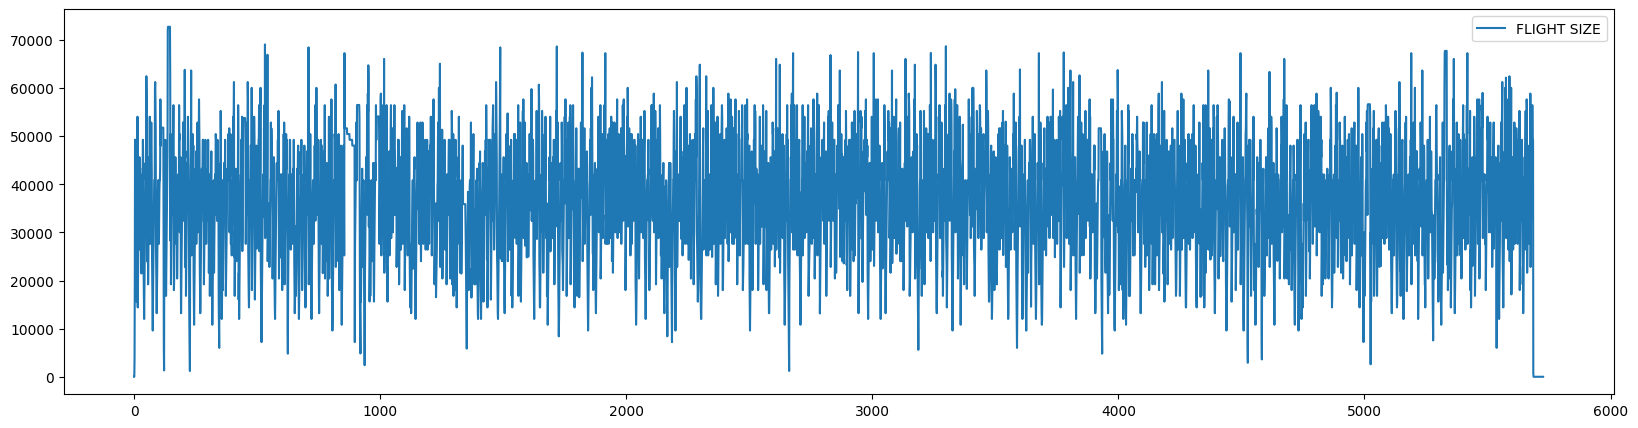

In [14]:
df.plot(y=['FLIGHT SIZE'], figsize=(20, 5))
mp.show()